In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [100]:
df = pd.read_csv("C:\\Users\\karan\\Downloads\\world_pop_mig_186_countries.csv")

Head

In [101]:
df.head()

,country,year,population,netMigration,population_in_millions
0,Afghanistan,2023,42239854.0,-65846.0,42
1,Afghanistan,2022,41128771.0,-65846.0,41
2,Afghanistan,2021,40099462.0,-183672.0,40
3,Afghanistan,2020,38972230.0,166821.0,38
4,Afghanistan,2019,37769499.0,-8082.0,37


Info

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11904 entries, 0 to 11903
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 11904 non-null  object 
 1   year                    11904 non-null  int64  
 2   population              11904 non-null  float64
 3   netMigration            11904 non-null  float64
 4   population_in_millions  11904 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 465.1+ KB


Changing type of netMigration to int

In [103]:
df['netMigration'] = df['netMigration'].astype(int)

Checking null values

In [104]:
df.isna().sum()

country                   0
year                      0
population                0
netMigration              0
population_in_millions    0
dtype: int64

Grouping by countries

In [105]:
agg_fns = {'population' : 'mean', 'netMigration' : 'sum', 'population_in_millions' : 'mean'}
df_con = df.groupby(by = "country").agg(agg_fns).reset_index()

In [125]:
df_con.head()

,country,population,netMigration,population_in_millions
0,Afghanistan,18782444.28,-2570326,18.296875
1,Albania,2713609.47,-1411489,2.187500
2,Algeria,26222807.80,-873554,25.703125
3,American Samoa,42368.72,-42044,0.000000
4,Andorra,50480.64,51997,0.000000


In [107]:
df_con['population'] = df_con['population'].map('{0:.2f}'.format).astype(float)
df_con['netMigration'] = df_con['netMigration'].astype(int)

In [108]:
df_con.head()

,country,population,netMigration,population_in_millions
0,Afghanistan,18782444.28,-2570326,18.296875
1,Albania,2713609.47,-1411489,2.187500
2,Algeria,26222807.80,-873554,25.703125
3,American Samoa,42368.72,-42044,0.000000
4,Andorra,50480.64,51997,0.000000


df_10_im = df_con.nsmallest(10, 'netMigration').set_index((x for x in range(1, 11)))

In [109]:
df_10_im

,country,population,netMigration,population_in_millions
1,Bangladesh,1.105028e+08,-20504716,110.000000
2,Pakistan,1.284559e+08,-18487914,128.015625
3,China,1.109125e+09,-17070233,1108.656250
4,Mexico,8.406356e+07,-14151531,83.531250
5,India,9.160693e+08,-11247041,915.562500
6,Philippines,6.734707e+07,-10049649,66.843750
7,Nepal,2.033104e+07,-4840949,19.843750
8,Ukraine,4.762207e+07,-4508153,47.125000
9,Morocco,2.475318e+07,-4175975,24.250000
10,Myanmar,3.961048e+07,-3739778,39.125000


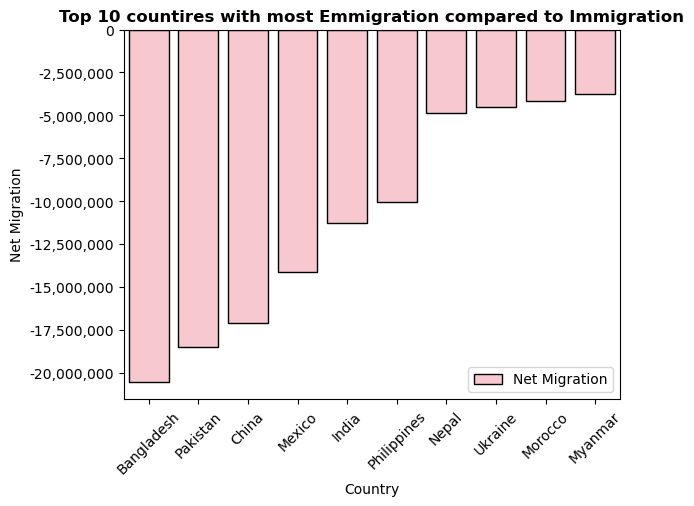

In [110]:
ax = sns.barplot(x = 'country', y = 'netMigration', data = df_10_im, color = 'pink', edgecolor = 'black', label = 'Net Migration')
plt.title("Top 10 countires with most Emmigration compared to Immigration", fontweight = 'bold')
plt.xlabel("Country")
plt.ylabel("Net Migration")
plt.xticks(rotation = 45)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos : '{:,.0f}'.format(x)))
plt.legend()
plt.show()

Getting top 10 countries with most immigration compared to emmigration

In [111]:
df_10_em = df_con.nlargest(10, 'netMigration').set_index((x for x in range(1, 11)))

In [112]:
df_10_em

,country,population,netMigration,population_in_millions
1,United States,2.587349e+08,67104784,258.218750
2,Germany,7.980769e+07,13307249,79.328125
3,Russian Federation,1.401766e+08,12488328,139.656250
4,Canada,2.822629e+07,10187120,27.765625
5,Australia,1.763149e+07,7818329,17.156250
6,Spain,3.975715e+07,7158047,39.218750
7,Saudi Arabia,1.804965e+07,6801678,17.562500
8,United Arab Emirates,3.434974e+06,6583164,2.968750
9,United Kingdom,5.889943e+07,5758559,58.453125
10,France,5.852740e+07,5171494,58.031250


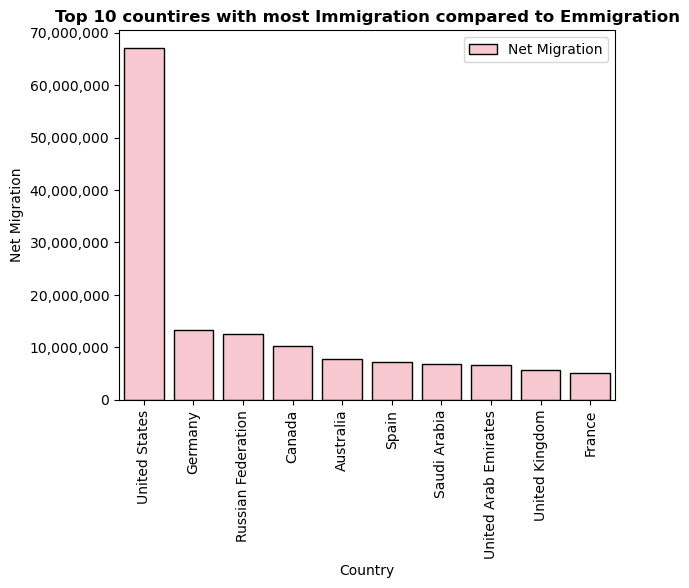

In [113]:
ax = sns.barplot(x = 'country', y = 'netMigration', data = df_10_em, color = 'pink', edgecolor = 'black', label = 'Net Migration')
plt.title("Top 10 countires with most Immigration compared to Emmigration", fontweight = 'bold')
plt.xlabel("Country")
plt.ylabel("Net Migration")
plt.xticks(rotation = 90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos : '{:,.0f}'.format(x)))
plt.legend()
plt.show()

Getting top 10 countries with most population

In [114]:
mask = 'year == 2023'
df_2023 = df.query(mask)

In [115]:
df_pop = df_2023.nlargest(10, 'population').set_index((x for x in range(1, 11)))

In [116]:
df_pop['population'] = df['population'].astype(int)

In [117]:
df_pop

,country,year,population,netMigration,population_in_millions
1,India,2023,41128771,-486136,1428
2,China,2023,40099462,-310220,1410
3,United States,2023,38972230,999700,334
4,Indonesia,2023,37769499,-49997,277
5,Pakistan,2023,36686784,-165988,240
6,Nigeria,2023,35643418,-59996,223
7,Brazil,2023,34636207,6000,216
8,Bangladesh,2023,33753499,-309977,172
9,Russian Federation,2023,32716210,-136414,143
10,Mexico,2023,31541209,-50239,128


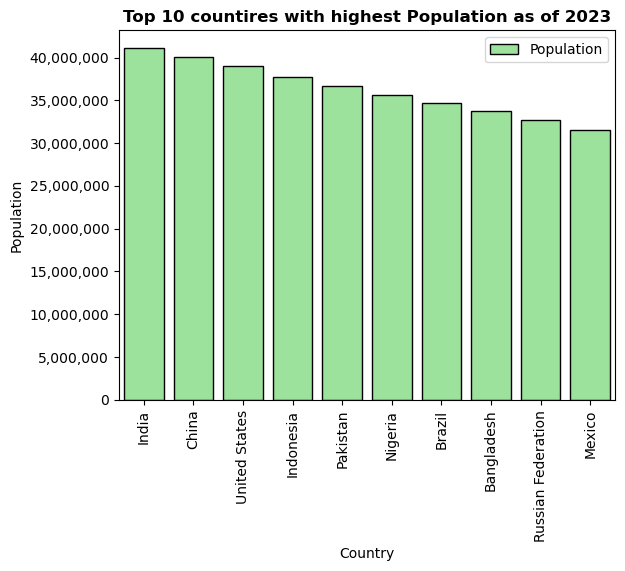

In [118]:
ax = sns.barplot(x = 'country', y = 'population', data = df_pop, color = 'lightgreen', edgecolor = 'black', label = 'Population')
plt.title("Top 10 countires with highest Population as of 2023", fontweight = 'bold')
plt.xlabel("Country")
plt.ylabel("Population")
plt.xticks(rotation = 90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos : '{:,.0f}'.format(x)))
plt.legend()
plt.show()

Adding one more coulmn with labels : 'Immigrant', 'Neutral' and 'Emmigrant'

In [119]:
bins = [float('-inf'), -1, 0, float('inf')]
labels = ['Immigrant', 'Neutral', 'Emmigrant']
df['migration_level'] = pd.cut(df['netMigration'], bins = bins, labels = labels)

In [120]:
df.head()

,country,year,population,netMigration,population_in_millions,migration_level
0,Afghanistan,2023,42239854.0,-65846,42,Immigrant
1,Afghanistan,2022,41128771.0,-65846,41,Immigrant
2,Afghanistan,2021,40099462.0,-183672,40,Immigrant
3,Afghanistan,2020,38972230.0,166821,38,Emmigrant
4,Afghanistan,2019,37769499.0,-8082,37,Immigrant


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11904 entries, 0 to 11903
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   country                 11904 non-null  object  
 1   year                    11904 non-null  int64   
 2   population              11904 non-null  float64 
 3   netMigration            11904 non-null  int32   
 4   population_in_millions  11904 non-null  int64   
 5   migration_level         11904 non-null  category
dtypes: category(1), float64(1), int32(1), int64(2), object(1)
memory usage: 430.4+ KB


Grouping by year

In [219]:
agg_fns = {'population' : 'sum', 'netMigration' : 'sum', 'population_in_millions' : 'sum'}
df_year = df.groupby(by = 'year').agg(agg_fns).reset_index()

In [220]:
df_year['population'] = df_year['population'].apply(lambda x: '{:,.0f}'.format(x))

In [221]:
df_year.head()

,year,population,netMigration,population_in_millions
0,1960,"2,844,936,241",-157637,2768
1,1961,"2,880,700,943",-109944,2808
2,1962,"2,929,792,605",-117574,2855
3,1963,"2,990,897,648",-126677,2916
4,1964,"3,052,372,562",-76099,2979


In [214]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    64 non-null     int64 
 1   population              64 non-null     object
 2   netMigration            64 non-null     int32 
 3   population_in_millions  64 non-null     int64 
dtypes: int32(1), int64(2), object(1)
memory usage: 1.9+ KB


In [193]:
df_10imy = df_year.nsmallest(10, 'netMigration').set_index((x for x in range(1, 11)))

In [194]:
df_10imy

,year,population,netMigration,population_in_millions
1,1990,"4,896,399,447",-1486422,4819
2,2014,"6,703,520,889",-1377025,6626
3,2015,"6,778,239,895",-1142949,6696
4,1994,"5,209,899,886",-1068721,5131
5,1981,"4,203,182,587",-901338,4124
6,2022,"7,251,903,065",-780984,7170
7,2013,"6,627,428,048",-562490,6556
8,1987,"4,656,080,773",-412250,4579
9,2016,"6,852,999,030",-322868,6769
10,1986,"4,576,411,679",-255984,4493


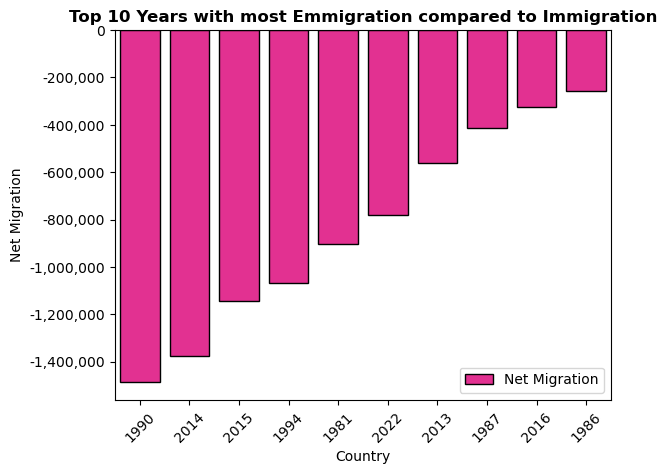

In [203]:
ax = sns.barplot(x = 'year', y = 'netMigration', data = df_10imy, color = 'deeppink', edgecolor = 'black', label = 'Net Migration', order = df_10imy['year'])
plt.title("Top 10 Years with most Emmigration compared to Immigration", fontweight = 'bold')
plt.xlabel("Country")
plt.ylabel("Net Migration")
plt.xticks(rotation = 45)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos : '{:,.0f}'.format(x)))
plt.legend()
plt.show()

In [196]:
df_10emy = df_year.nlargest(10, 'netMigration').set_index((x for x in range(1, 11)))

In [197]:
df_10emy

,year,population,netMigration,population_in_millions
1,2018,"7,001,440,911",1920561,6920
2,2019,"7,072,772,096",1563542,6991
3,1996,"5,362,566,218",1493714,5280
4,1993,"5,133,366,163",1481893,5057
5,2002,"5,810,183,489",1105564,5735
6,2017,"6,927,941,751",1051169,6848
7,1995,"5,285,529,549",923241,5202
8,2020,"7,141,398,166",913189,7063
9,2021,"7,199,307,908",793782,7119
10,1992,"5,054,951,830",747838,4975


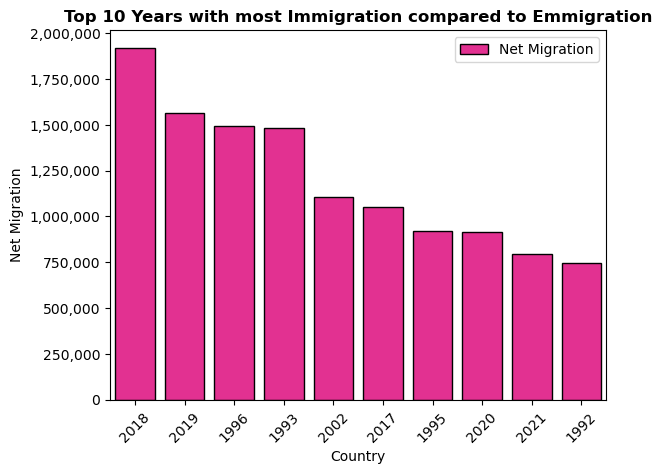

In [198]:
ax = sns.barplot(x = 'year', y = 'netMigration', data = df_10emy, color = 'deeppink', edgecolor = 'black', label = 'Net Migration', order = df_10emy['year'])
plt.title("Top 10 Years with most Immigration compared to Emmigration", fontweight = 'bold')
plt.xlabel("Country")
plt.ylabel("Net Migration")
plt.xticks(rotation = 45)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos : '{:,.0f}'.format(x)))
plt.legend()
plt.show()

Getting top 10 years with most population

In [229]:
df_10pop_year = df.groupby(by = 'year').agg(agg_fns).reset_index()

In [230]:
df_10pop = df_10pop_year.nlargest(10, 'population').set_index((x for x in range(1, 11)))

In [231]:
df_10pop['population'] = df_10pop['population'].apply(lambda x: '{:,.0f}'.format(x))

In [232]:
df_10pop

,year,population,netMigration,population_in_millions
1,2023,"7,314,242,161",337134,7232
2,2022,"7,251,903,065",-780984,7170
3,2021,"7,199,307,908",793782,7119
4,2020,"7,141,398,166",913189,7063
5,2019,"7,072,772,096",1563542,6991
6,2018,"7,001,440,911",1920561,6920
7,2017,"6,927,941,751",1051169,6848
8,2016,"6,852,999,030",-322868,6769
9,2015,"6,778,239,895",-1142949,6696
10,2014,"6,703,520,889",-1377025,6626


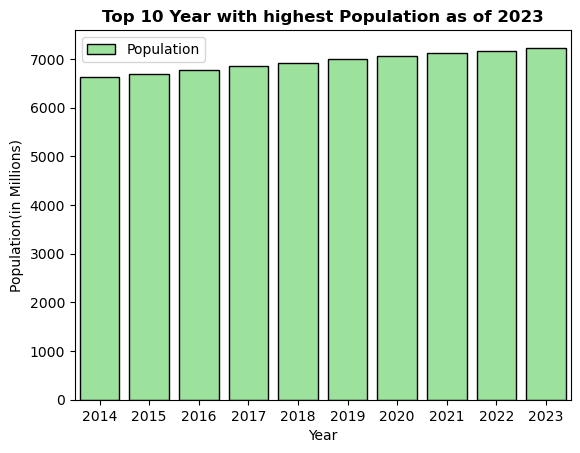

In [239]:
ax = sns.barplot(x = 'year', y = 'population_in_millions', data = df_10pop, color = 'lightgreen', edgecolor = 'black', label = 'Population')
plt.title("Top 10 Year with highest Population as of 2023", fontweight = 'bold')
plt.xlabel("Year")
plt.ylabel("Population(in Millions)")
plt.legend()
plt.show()

Correlation

In [242]:
df.corr(numeric_only = True)

,year,population,netMigration,population_in_millions
year,1.000000,0.064605,0.004664,0.064565
population,0.064605,1.000000,-0.089195,0.999996
netMigration,0.004664,-0.089195,1.000000,-0.089206
population_in_millions,0.064565,0.999996,-0.089206,1.000000
